In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re




In [2]:
data = pd.read_csv('apple_iphone_11_reviews.csv')
print("Shape of the data:", data.shape)

Shape of the data: (5010, 12)


In [3]:
data.head(10)

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI
5,5,Apple iPhone XR (64GB) - Black,313 people found this helpful,2,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-04-22,I was delivered a phone that did not work imme...,1.0 out of 5 stars,Apple,Anand S Prasad,Never purchase a phone online.
6,6,Apple iPhone XR (64GB) - Black,189 people found this helpful,3,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-07,It has been a month since I started using my i...,5.0 out of 5 stars,Apple,Srikanth Jatla,Awesome iPhone
7,7,Apple iPhone XR (64GB) - Black,164 people found this helpful,1,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-25,The phone is hanging. Video quality is not ver...,1.0 out of 5 stars,Apple,KAILASH C.,Exchange of I phone xr with xs.
8,8,Apple iPhone XR (64GB) - Black,124 people found this helpful,1,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-04-27,I'll use this review to mostly say what I'm no...,4.0 out of 5 stars,Apple,LDM,Worth upgrading from the 6S? I'll know in a fe...
9,9,Apple iPhone XR (64GB) - Black,94 people found this helpful,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-04-21,Went with the iPhone XR after over a month of ...,1.0 out of 5 stars,Apple,Amazon Customer,Def a bad experience


In [4]:
data.drop(columns=['product','helpful_count','total_comments','url','review_country','reviewed_at','product_company','profile_name','review_title'],inplace=True)

In [5]:
data.shape

(5010, 3)

In [6]:
data.head()

,index,review_text,review_rating
0,0,NOTE:,3.0 out of 5 stars
1,1,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars
2,2,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars
3,3,So I got the iPhone XR just today. The product...,1.0 out of 5 stars
4,4,I've been an android user all my life until I ...,5.0 out of 5 stars


In [7]:
import re

In [8]:
def remove_numbers(text):
    return ' '.join([i for i in str(text).split() if not i.isdigit()])
    data['cleaned_text'] = data['review_text'].apply(lambda x: remove_numbers(x))
    

In [9]:
data['cleaned_text'] = data['review_text'].str.lower()

In [10]:
data.head()

,index,review_text,review_rating,cleaned_text
0,0,NOTE:,3.0 out of 5 stars,note:
1,1,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,very bad experience with this iphone xr phone....
2,2,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,amazing phone with amazing camera coming from ...
3,3,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,so i got the iphone xr just today. the product...
4,4,I've been an android user all my life until I ...,5.0 out of 5 stars,i've been an android user all my life until i ...


In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer

In [12]:
STOPWORDS = set(stopwords.words('english'))
def remove_stpwrds(text):
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [13]:
data['cleaned_text'] = data['cleaned_text'].apply(lambda x: remove_stpwrds(x))

In [14]:
data.head()

,index,review_text,review_rating,cleaned_text
0,0,NOTE:,3.0 out of 5 stars,note:
1,1,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,bad experience iphone xr phone. back camera fo...
2,2,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,amazing phone amazing camera coming iphone 7 p...
3,3,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,got iphone xr today. product looks amazing. un...
4,4,I've been an android user all my life until I ...,5.0 out of 5 stars,i've android user life decided try iphone xr i...


In [15]:
import string
string.punctuation



'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punctuation(text):
    # Define the pattern for punctuation using regular expression
    punctuation_pattern = re.compile(r'[^\w\s]')
    
    # Use the sub() function to replace punctuation with an empty string
    processed_text = punctuation_pattern.sub('', text)
    
    data['No_punct'] = data['cleaned_text'].apply(remove_punctuation)
    


In [17]:
data.head()

,index,review_text,review_rating,cleaned_text
0,0,NOTE:,3.0 out of 5 stars,note:
1,1,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,bad experience iphone xr phone. back camera fo...
2,2,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,amazing phone amazing camera coming iphone 7 p...
3,3,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,got iphone xr today. product looks amazing. un...
4,4,I've been an android user all my life until I ...,5.0 out of 5 stars,i've android user life decided try iphone xr i...


In [18]:
# Function to remove punctuation
def remove_punctuation(text):
    # Define the pattern for punctuation using regular expression
    punctuation_pattern = re.compile(r'[^\w\s]')
    # Use the sub() function to replace punctuation with an empty string
    return punctuation_pattern.sub('', text)

# Apply function to remove punctuation
data['No_punct'] = data['cleaned_text'].apply(remove_punctuation)


In [19]:
data.head()

,index,review_text,review_rating,cleaned_text,No_punct
0,0,NOTE:,3.0 out of 5 stars,note:,note
1,1,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,bad experience iphone xr phone. back camera fo...,bad experience iphone xr phone back camera fou...
2,2,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,amazing phone amazing camera coming iphone 7 p...,amazing phone amazing camera coming iphone 7 p...
3,3,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,got iphone xr today. product looks amazing. un...,got iphone xr today product looks amazing unfo...
4,4,I've been an android user all my life until I ...,5.0 out of 5 stars,i've android user life decided try iphone xr i...,ive android user life decided try iphone xr io...


In [20]:
#COUNTING THE WORDS WHICH ARE USED FREQUENTLY IN THE REVIEWS
from collections import Counter
cnt = Counter()

for text in data['No_punct'].values:
  for word in text.split():
    cnt[word] += 1

cnt.most_common(10)

[('phone', 1505),
 ('good', 1423),
 ('iphone', 907),
 ('product', 787),
 ('battery', 723),
 ('camera', 555),
 ('best', 515),
 ('apple', 513),
 ('awesome', 448),
 ('life', 437)]

In [21]:
#COUNTING THE WORDS WHICH ARE RARELY USED THE GIVEN REVIEWS
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])

# Let's see what are the Rarewords

RAREWORDS

{'af',
 'dhamaka',
 'excelent',
 'exultant',
 'fantabulous',
 'gooy',
 'handled',
 'locks',
 'okok',
 'spr'}

In [22]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

wordnet_map = {"n": wordnet.NOUN, "v": wordnet.VERB, "j": wordnet.ADJ, "r": wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.VERB)) for word, pos in pos_tagged_text])

data['lemmatized_text'] = data['No_punct'].apply(lambda text: lemmatize_words(text))

##df["text_lemmatized"] = df['clean_tweets'].apply(lambda text: lemmatize_words(text))


In [23]:
data.head()

,index,review_text,review_rating,cleaned_text,No_punct,lemmatized_text
0,0,NOTE:,3.0 out of 5 stars,note:,note,note
1,1,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,bad experience iphone xr phone. back camera fo...,bad experience iphone xr phone back camera fou...,bad experience iphone xr phone back camera fin...
2,2,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,amazing phone amazing camera coming iphone 7 p...,amazing phone amazing camera coming iphone 7 p...,amaze phone amaze camera come iphone 7 plus gr...
3,3,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,got iphone xr today. product looks amazing. un...,got iphone xr today product looks amazing unfo...,get iphone xr today product look amaze unfortu...
4,4,I've been an android user all my life until I ...,5.0 out of 5 stars,i've android user life decided try iphone xr i...,ive android user life decided try iphone xr io...,ive android user life decide try iphone xr ios...


In [24]:
short_words = {
"aint": "am not",
"arent": "are not",
"cant": "cannot",
"'cause": "because",
"couldve": "could have",
"couldnt": "could not",
"didnt": "did not",
"doesnt": "does not",
"dont": "do not",
"hadnt": "had not",
"hasnt": "has not",
"havent": "have not",
"im": "I am",
"em": "them",
"ive": "I have",
"isnt": "is not",
"lets": "let us",
"theyre": "they are",
"theyve": "they have",
"wasnt": "was not",
"well": "we will",
"were": "we are",
"werent": "were not",
"you're": "you are",
"you've": "you have"
}

In [25]:
#REPLACING THE SHORT WORDS
def replace_short_words(text):
  for word in text.split():
    if word in short_words:
      text = text.replace(word, short_words[word])
  
  return text

In [26]:
data['After_lemm'] = data['lemmatized_text'].apply(lambda text: replace_short_words(text))

In [27]:
data.head()

,index,review_text,review_rating,cleaned_text,No_punct,lemmatized_text,After_lemm
0,0,NOTE:,3.0 out of 5 stars,note:,note,note,note
1,1,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,bad experience iphone xr phone. back camera fo...,bad experience iphone xr phone back camera fou...,bad experience iphone xr phone back camera fin...,bad experience iphone xr phone back camera fin...
2,2,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,amazing phone amazing camera coming iphone 7 p...,amazing phone amazing camera coming iphone 7 p...,amaze phone amaze camera come iphone 7 plus gr...,amaze phone amaze camera come iphone 7 plus gr...
3,3,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,got iphone xr today. product looks amazing. un...,got iphone xr today product looks amazing unfo...,get iphone xr today product look amaze unfortu...,get iphone xr today product look amaze unfortu...
4,4,I've been an android user all my life until I ...,5.0 out of 5 stars,i've android user life decided try iphone xr i...,ive android user life decided try iphone xr io...,ive android user life decide try iphone xr ios...,I have android user life decide try iphone xr ...


In [28]:
##data['Cleaned_Reviews'] = data['Tokenized_Reviews'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
data['cleaned_text'] = data['No_punct'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [29]:
data.head()

,index,review_text,review_rating,cleaned_text,No_punct,lemmatized_text,After_lemm
0,0,NOTE:,3.0 out of 5 stars,note,note,note,note
1,1,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,bad experience iphone xr phone back camera fou...,bad experience iphone xr phone back camera fou...,bad experience iphone xr phone back camera fin...,bad experience iphone xr phone back camera fin...
2,2,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,amazing phone amazing camera coming iphone 7 p...,amazing phone amazing camera coming iphone 7 p...,amaze phone amaze camera come iphone 7 plus gr...,amaze phone amaze camera come iphone 7 plus gr...
3,3,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,got iphone xr today product looks amazing unfo...,got iphone xr today product looks amazing unfo...,get iphone xr today product look amaze unfortu...,get iphone xr today product look amaze unfortu...
4,4,I've been an android user all my life until I ...,5.0 out of 5 stars,ive android user life decided try iphone xr io...,ive android user life decided try iphone xr io...,ive android user life decide try iphone xr ios...,I have android user life decide try iphone xr ...


In [30]:
from textblob import TextBlob

# Function to calculate sentiment
def calculate_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [31]:
data['Reviews_Sentiment'] = data['cleaned_text'].apply(calculate_sentiment)

In [32]:
data.head()

,index,review_text,review_rating,cleaned_text,No_punct,lemmatized_text,After_lemm,Reviews_Sentiment
0,0,NOTE:,3.0 out of 5 stars,note,note,note,note,Neutral
1,1,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,bad experience iphone xr phone back camera fou...,bad experience iphone xr phone back camera fou...,bad experience iphone xr phone back camera fin...,bad experience iphone xr phone back camera fin...,Negative
2,2,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,amazing phone amazing camera coming iphone 7 p...,amazing phone amazing camera coming iphone 7 p...,amaze phone amaze camera come iphone 7 plus gr...,amaze phone amaze camera come iphone 7 plus gr...,Positive
3,3,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,got iphone xr today product looks amazing unfo...,got iphone xr today product looks amazing unfo...,get iphone xr today product look amaze unfortu...,get iphone xr today product look amaze unfortu...,Positive
4,4,I've been an android user all my life until I ...,5.0 out of 5 stars,ive android user life decided try iphone xr io...,ive android user life decided try iphone xr io...,ive android user life decide try iphone xr ios...,I have android user life decide try iphone xr ...,Positive


In [33]:

print('Data imbalance for Reviews:')
print(data['Reviews_Sentiment'].value_counts())

Data imbalance for Reviews:
Reviews_Sentiment
Positive    3958
Neutral      786
Negative     266
Name: count, dtype: int64


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler

In [35]:
X = data['After_lemm']
y = data['Reviews_Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

In [37]:
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# Create the TfidfVectorizer and transform the training and test data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [38]:
model = SVC()
model.fit(X_train_tfidf, y_train)

SVC()

In [39]:
import pickle
pickle_out = open("classifier.pkl", "wb")
pickle.dump (model, pickle_out) 
pickle_out.close ()

In [40]:
y_pred = model.predict(X_test_tfidf)

In [41]:
from sklearn.metrics import accuracy_score, classification_report

In [42]:
accuracy_SVC = accuracy_score(y_test, y_pred)
print("Accuracy using SVC:", accuracy_SVC)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy using SVC: 0.8932135728542914
Classification Report:
              precision    recall  f1-score   support

    Negative       0.94      0.29      0.44        59
     Neutral       0.84      0.67      0.74       153
    Positive       0.90      0.98      0.94       790

    accuracy                           0.89      1002
   macro avg       0.90      0.65      0.71      1002
weighted avg       0.89      0.89      0.88      1002



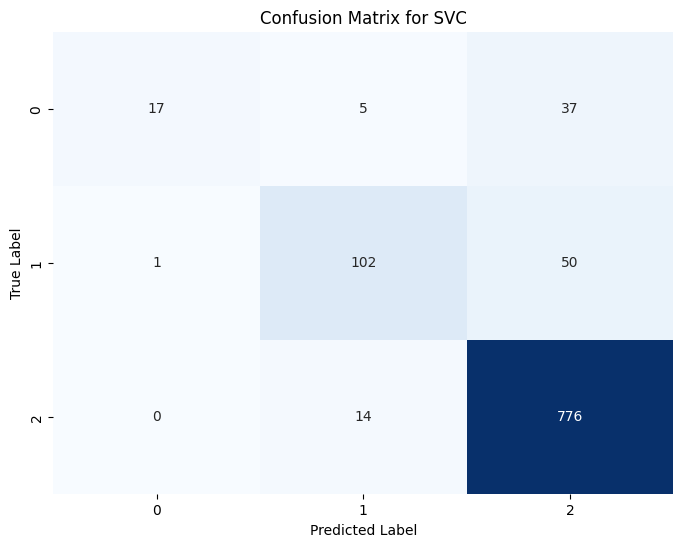

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have trained the SVC model and obtained predictions y_pred and true labels y_true

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for SVC')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

# Generate predictions
y_pred_rf = rf_model.predict(X_test_tfidf)

# Calculate accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Score for Random Forest:", accuracy_rf)

# Generate classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Accuracy Score for Random Forest: 0.9111776447105788
Classification Report for Random Forest:
              precision    recall  f1-score   support

    Negative       0.96      0.41      0.57        59
     Neutral       0.77      0.83      0.80       153
    Positive       0.94      0.96      0.95       790

    accuracy                           0.91      1002
   macro avg       0.89      0.73      0.77      1002
weighted avg       0.91      0.91      0.91      1002



In [45]:
import pickle
pickle_out = open("classifier.pkl", "wb")
pickle.dump (rf_model, pickle_out) 
pickle_out.close ()

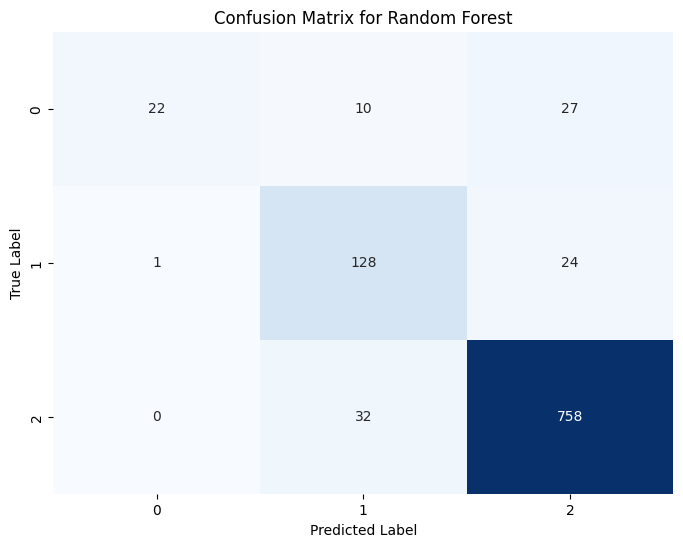

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

# Generate predictions
y_pred_rf = rf_model.predict(X_test_tfidf)

# Generate confusion matrix
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [48]:
log_model = LogisticRegression()
log_model.fit(X_train_tfidf,y_train)

LogisticRegression()

In [49]:
y_pred_LR = log_model.predict(X_test_tfidf)

In [50]:
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print("Accuracy by using LR:", accuracy_LR)
print("Classification Report:")
print(classification_report(y_test,y_pred_LR))

Accuracy by using LR: 0.8982035928143712
Classification Report:
              precision    recall  f1-score   support

    Negative       0.95      0.31      0.46        59
     Neutral       0.83      0.71      0.76       153
    Positive       0.91      0.98      0.94       790

    accuracy                           0.90      1002
   macro avg       0.90      0.66      0.72      1002
weighted avg       0.90      0.90      0.89      1002



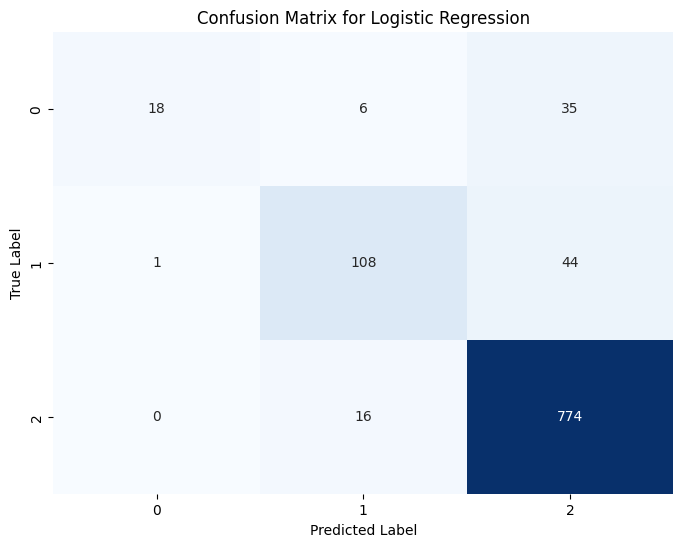

In [51]:
# Generate confusion matrix
conf_mat_lr = confusion_matrix(y_test, y_pred_LR)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [52]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [53]:
y_pred_knn = knn_model.predict(X_test_tfidf)


In [54]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy using KNN: ", accuracy_knn)
print(classification_report(y_test, y_pred_knn))

Accuracy using KNN:  0.6027944111776448
              precision    recall  f1-score   support

    Negative       0.85      0.19      0.31        59
     Neutral       0.27      0.89      0.41       153
    Positive       0.96      0.58      0.72       790

    accuracy                           0.60      1002
   macro avg       0.69      0.55      0.48      1002
weighted avg       0.84      0.60      0.65      1002



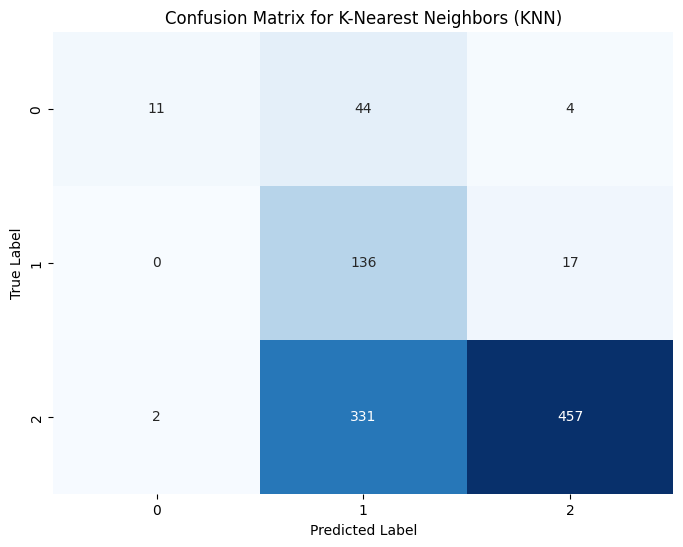

In [55]:
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for K-Nearest Neighbors (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [56]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_tfidf.toarray(),y_train)

GaussianNB()

In [57]:
y_pred_NB = naive_bayes_model.predict(X_test_tfidf.toarray())

In [58]:
accuracy_NB = accuracy_score(y_test , y_pred_NB)
print("Accuracy score using Naive Bayes: ", accuracy_NB)
print("classification report: ")
print(classification_report(y_test,y_pred_NB))

Accuracy score using Naive Bayes:  0.5858283433133733
classification report: 
              precision    recall  f1-score   support

    Negative       0.08      0.46      0.14        59
     Neutral       0.56      0.37      0.45       153
    Positive       0.89      0.64      0.74       790

    accuracy                           0.59      1002
   macro avg       0.51      0.49      0.44      1002
weighted avg       0.79      0.59      0.66      1002



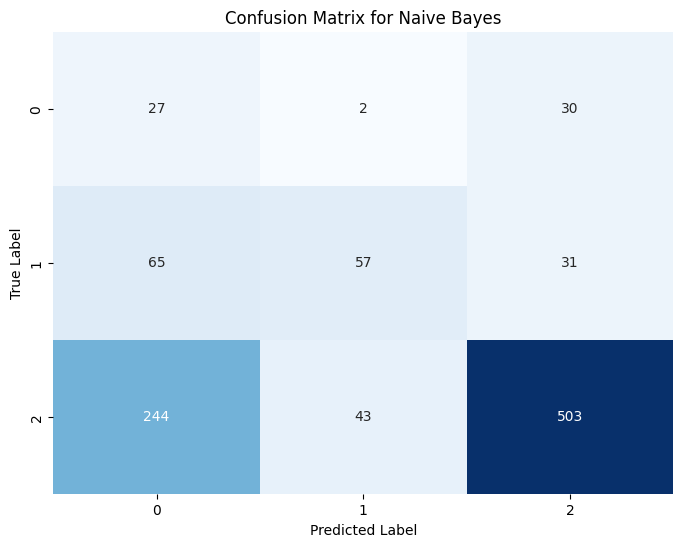

In [59]:
conf_mat_nb = confusion_matrix(y_test, y_pred_NB)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [60]:
accuracy_scores = [accuracy_SVC ,accuracy_rf, accuracy_LR , accuracy_knn , accuracy_NB,]
model_names = ['SVM','RandomForestClassifier','Logistic Regression', 'KNN','Naive Bayes']


/var/folders/_3/x_qdth1d1d38nj0q428ryd0h0000gn/T/ipykernel_28046/653652280.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data= df_accuracy,palette= 'viridis')


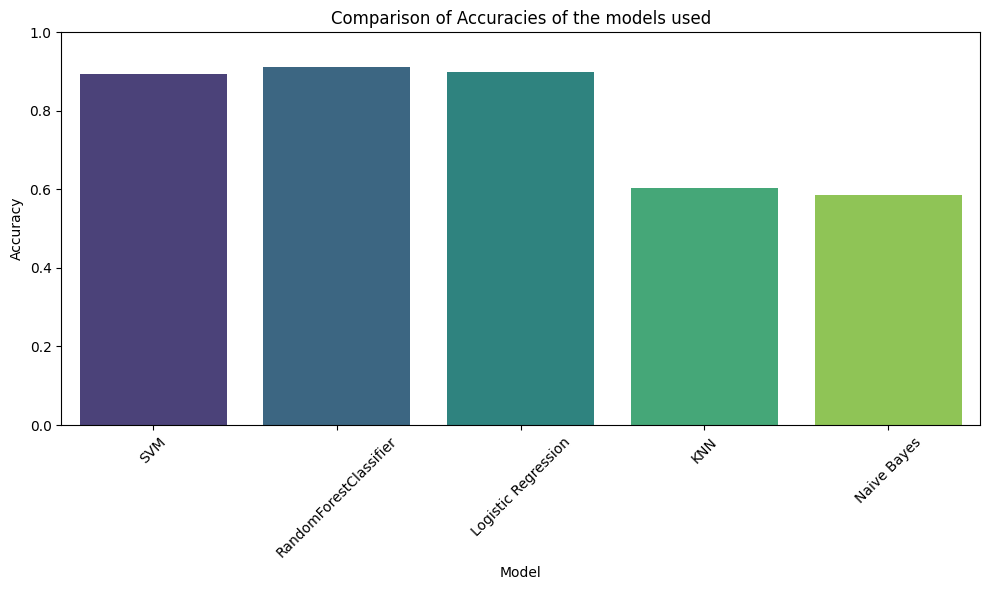

In [61]:
df_accuracy = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores})

plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Accuracy', data= df_accuracy,palette= 'viridis')
plt.title("Comparison of Accuracies of the models used")
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
accuracies = [accuracy_SVC, accuracy_rf, accuracy_LR, accuracy_knn, accuracy_NB]

# Print the list of accuracies
print("List of Accuracies:")
for idx, acc in enumerate(accuracies, start=1):
    print(f"Model {idx}: {acc:.4f}")

List of Accuracies:
Model 1: 0.8932
Model 2: 0.9112
Model 3: 0.8982
Model 4: 0.6028
Model 5: 0.5858
